In [1]:
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
import math
import pandas as pd
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get
from scipy.interpolate import make_interp_spline
import pylab

In [2]:
# Time & Sample

Ts = .1
T_start = 0.0
T_end = 20.0

# Number of samples
sample_range = np.linspace(T_start,T_end,int(T_end/Ts))
len(sample_range)



200

In [3]:
# Initial Variables

# Noise
signoise = 1

XH = 0
XDH = 0

# Omega
omega = .1

# Amplitude
amp = 1



In [4]:
# Setup steady-state matrices

# Noise
# rmat = signoise ** 2
rmat = np.eye(2) * (signoise ** 2)
# rmat = signoise

# Covariance
# P = np.diag((99999999999, 99999999999))
# P = np.diag((1,1))
P = np.zeros((2,2))

# Process Noise
phis = 1
Q0 = np.array([[(Ts**3)/3, (Ts**2)/2],[(Ts**2)/2, Ts]])
Q = phis * Q0

# System Matrix - State
phi = np.array([[np.cos(omega*Ts), np.sin(omega*Ts)/omega],[-omega*np.sin(omega*Ts), np.cos(omega*Ts)]])

# System Matrix - Input

# Measurment matrix
H = np.array([1,0])



0.1
0.09998586363834151
0.09994345855010048
phi_1:  0.915697778384552


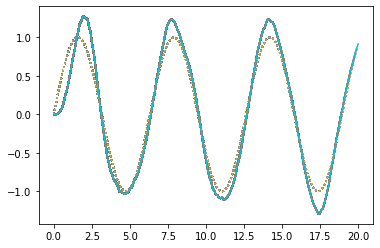

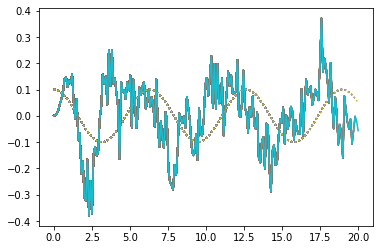

In [5]:
# Run Kalman filter

# Initialize variables

x0 = []
x_org = []
x_dot = []
xh_1 = []
xdh_1 = []
res_0 = []
IDN = np.eye(2)
samp_range = []
x_err_x = []
x_err_x_dot = []
phi_mat_x = []
phi_mat_x_dot = []
for i in range(0,len(sample_range)):

    # Solve for Prediciton (M)
    # PHIP = np.dot(phi,P)
    # PHIPPHIT = np.dot(PHIP,phi.T)
    # M = PHIPPHIT + Q
    M = np.dot(np.dot(phi,P),phi.T) + Q
    
    # Solve for Kalman Gain
    # HM = np.dot(H,M)
    # HMHT = np.dot(HM,H.T)
    # HMHTR = HMHT + rmat
    S = np.dot(np.dot(H,M),H.T) + rmat
    # print(HMHTR)
    # HMHTRINV = 1/HMHTR[0,0]
    # print(HMHTRINV)
    # HH2 = np.linalg.inv(HMHTR)
    # print(HH2)
    HH2 = np.linalg.inv(S)
    MHT = np.dot(M,H.T)
    K = np.dot(MHT,HH2)
    # Process Noise
    # KH = np.dot(K,H)
    IKH = IDN-np.dot(K,H)
    P = np.dot(IKH,M)
    
    # Setup plots with noise
    X = amp*np.sin(omega*i)
    x_org.append(X)    
    XD = amp*omega*np.cos(omega*i)
    x_dot.append(XD) 
    XS = X + np.random.normal(0, omega)
    x0.append(XS)
    
    # Track samples
    samp_range.append(sample_range[i])
    # Plot sample (x-axis)
    # plt.plot(samp_range, x_org, linestyle = ":")

    # Reassign variable    
    XHOLD = XH
    
    # Residuals
    RES = XS-(XH*np.cos(omega*Ts))-((np.sin(omega*Ts)*XDH)/omega)    
    # Version 2
    RES2 = XS - np.dot(np.dot(H,phi),XHOLD)
    
    # Solve for position
    XH = np.cos(omega*Ts)*XH + (XDH*(np.sin(omega*Ts)/omega)) + K[0]*RES
    xh_1.append(XH)    
    # plt.plot(samp_range,xh_1)
    
    # Solve for velocity
    XDH = (-omega*np.sin(omega*Ts)*XHOLD) + (XDH*(np.cos(omega*Ts))) + K[1]*RES
    xdh_1.append(XDH)
    # plt.plot(samp_range,xdh_1)
    
    # Update 
    phi_0 = np.dot(phi,XH)
    phi_1 = phi_0[:,0] + K*RES
    # Add value to list
    phi_mat_x.append(phi_1[0])

    # Create Plots
    # Figure 1
    plt.figure(1)
    plt.plot(samp_range, x_org, linestyle = ":")
    plt.plot(samp_range,phi_mat_x) 
    # Alternate equation to be plotted
    # plt.plot(samp_range,xh_1)
    plt.grid()
    phi_mat_x_dot.append(phi_1[1])
    # Figure 2
    plt.figure(2)
    plt.plot(samp_range, x_dot, linestyle = ":")
    plt.plot(samp_range,phi_mat_x_dot) 
    # Alternate equation to be plotted
    # plt.plot(samp_range,xdh_1)
    plt.grid()
    
    # Calculate Error
    # Position
    x_err_0 = (abs(phi_1[0]) - abs(X))
    x_err_x.append(x_err_0)
    # Velocity
    x_err_1 = (abs(phi_1[1]) - abs(XD))
    x_err_x_dot.append(x_err_1)    
    
# Calculate number of polynomials of plot

# o = 0
# oo = o + 1
# Maximum amplitude (height)
max_amp = max(x_dot)
# Index of maximum amplitude
x_dot.count([max_amp])
pp1 = 3
# Initialize variables
# Count position position
cnt = []
# Count velocity position
cnt1 = []
for j in range(0,len(sample_range)):
    # If statement to find maximum(positive) amplitudes
    if x_dot[j] == max_amp and j < len(sample_range)-1:
        # Update list of amplitudes
        cnt.append(x_dot[j])
        # Index of max amplitude
        pp = x_dot.index(max_amp) 
        # Update list of max amplitude index
        cnt1.append(pp)
        max_amp = max(x_dot[pp+1:])

# Determine indices of max amplitudes
# Initialize counter
max_amp_cnt = 0
for k in range(1,len(cnt1)):
    amp_cnt = cnt1[k] - cnt1[k-1]
#     print(aw)
    if amp_cnt <= 1:
        break
#     print(amp_cnt)
    max_amp_cnt += 1


# Run max amplitudes
for l in range(0,max_amp_cnt):
    print(cnt[l])

print("phi_1: ",phi_1[0])
# print(x_err_x_dot)

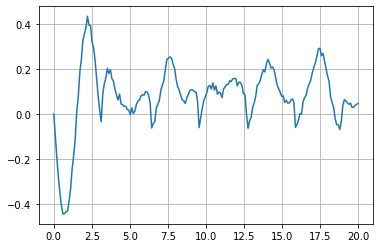

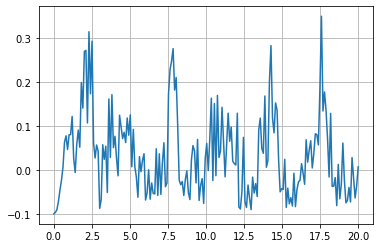

In [6]:
# Plots
plt.figure(1)
plt.plot(sample_range, x_err_x)
plt.grid()
plt.figure(2)
plt.plot(sample_range, x_err_x_dot)
plt.grid()

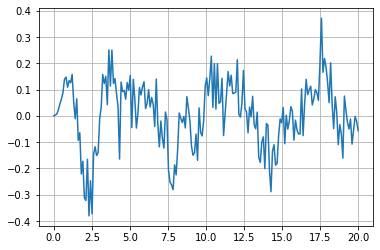

In [7]:
plt.plot(sample_range,phi_mat_x_dot)
plt.grid()

In [8]:
# plt.plot(sample_range,x_org,sample_range,x0, linestyle=":")
# plt.plot(sample_range,xh_1, color='red', linestyle="--")
# print(np.dot(phi,XH))
# print(np.cos(omega*Ts)*XH + (XDH*(np.sin(omega*Ts)/omega)))
# print(phi_1[0])


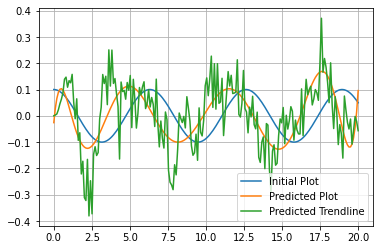

In [9]:
# Smoothen plots

# Matrix Size: Degree of Polynomial
poly_deg = max_amp_cnt * 3
mat_size = poly_deg + 1

# Create dummy matrix
a = np.ones((mat_size,mat_size))
b = np.ones((mat_size,1))

#%%
# Create Input & Output arrays

# Create output values
y = phi_mat_x_dot
# for i in range(0,row_data):
#     y.append(dataset.iloc[i,7])

# Create input values
# len_Jan = len(y)
x = sample_range
actual_x = x

# Normalize input array
# Mean
meanX = np.mean(x, axis=0)
# meanY = np.mean(y_Jan, axis=0)
# Standard Deviation
stdX = np.std(x, axis = 0)
x = (x- meanX) / stdX
# Variance
varX = np.var(y)

# print(x)

#%%
# Create design matrix
for i in range(0,mat_size):
    for j in range(0,mat_size):
        a[i][j] = sum(np.power(x,(i+j)))

# Create matrix
amat = np.mat(a)

# print(a)
# print(a[0][0])

# Create design output
for k in range(0, mat_size):
    b[k] = sum(np.power(x,k) * y)

#%%
# Calculate coefficients
# Inverse input matrix
amat_inv = np.linalg.pinv(amat)
z = amat_inv * b
# Transpose coefficient vector
zz = z.T
# Reverse index list
z3 = zz[::-1]
# print("z3: ", z3)

#%%
# Predict values

# Create list
x_list = sample_range
x = x_list
# Normalization
x = (x - meanX) / stdX

# Create dummy array
J = np.ones((len(x), 1))
cost = np.ones((len(x),1))
vec_out = np.ones((mat_size, 1))
# Solve for predicted values
for q in (range(len(x))):
    for p in range(0, mat_size):
        vec_out[p] = x[q] ** p
    # Algebraic vector
    vec_out = np.matrix(vec_out)
    # Matrix multiplication
    l = np.matmul(z3,vec_out)
    J[q] = l
    # Cost Function
    cost[q] = (1/(2 * len(x))) * np.sum(np.square(J[q] - vec_out))

    
# Actual & Predicted values
plot1 = plt.figure(1)
plt.plot(actual_x, x_dot)
plt.plot(x_list, J)
plt.plot(sample_range,phi_mat_x_dot)
# plt.plot(x_list, J_tot_smooth)
plt.legend(["Initial Plot", "Predicted Plot", "Predicted Trendline"])
plt.grid()

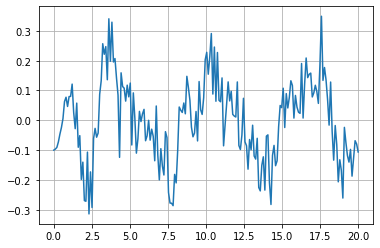

In [10]:
# Initialize error array
y = x_dot
error = []
phi_dot_error = []
for i in range(0,len(J)):
    pred_error = J[i]
    actual_error = y[i]
    phi_dot_err = phi_mat_x_dot[i]
    err = pred_error - actual_error
    err2 = phi_mat_x_dot[i] - actual_error
    error.append(err2)
    
# Error plot
plot3 = plt.figure(3)
plt.plot(sample_range,error)
# plt.plot(actual_x, phi_mat_x_dot)
plt.grid()


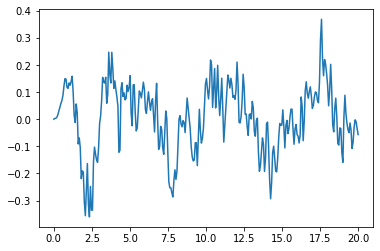

In [11]:
# Plot using spline function from scilearn library
x_new = np.linspace(T_start,T_end, 300)
a_BSpline = make_interp_spline(sample_range, phi_mat_x_dot)
y_new = a_BSpline(x_new)
plt.plot(x_new, y_new)

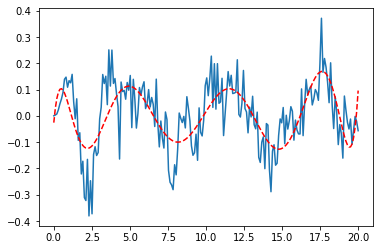

In [12]:
# Polynomial fit using pylab
x = sample_range
z = np.polyfit(sample_range, phi_mat_x_dot, 9)
p = np.poly1d(z)
plt.plot(sample_range, phi_mat_x_dot)
pylab.plot(x,p(x),"r--")